<p>Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste</p>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [57]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")

In [58]:
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485


<p> Nuestra variable respuesta era IMDB_Ratings </p>

<p> 1. Método manual </p>

In [59]:
media = df["IMDB_Rating"].mean()
maximo = df["IMDB_Rating"].max()
minimo = df["IMDB_Rating"].min()

In [60]:
df["Ratings_NORM"] = (df["IMDB_Rating"]- media)/(maximo - minimo)

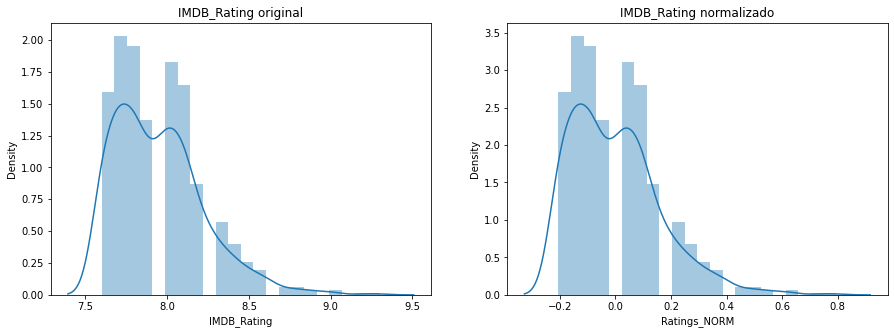

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('IMDB_Rating original')
axes[1].set_title('IMDB_Rating normalizado')

sns.distplot(df['IMDB_Rating'] ,ax = axes[0])
sns.distplot(df['Ratings_NORM'], ax = axes[1]);

In [62]:
stats.shapiro(df["Ratings_NORM"])

ShapiroResult(statistic=0.9192975163459778, pvalue=1.1022110980331986e-22)

<p>2. Método logarítmico </p>

In [63]:
df["Rating_LOG"] = df["IMDB_Rating"].apply(lambda x: np.log(x) if x > 0 else 0)

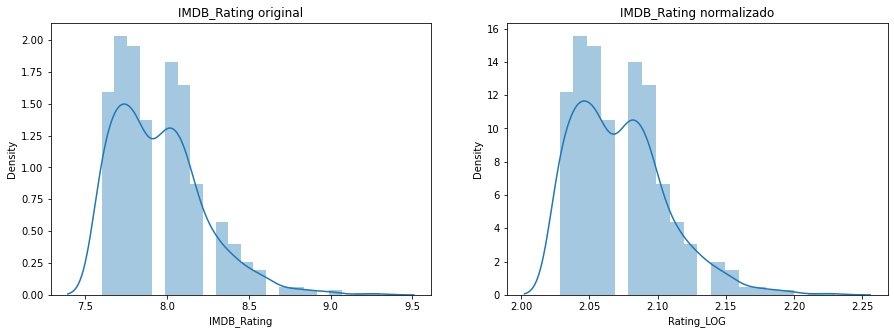

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('IMDB_Rating original')
axes[1].set_title('IMDB_Rating normalizado')

sns.distplot(df['IMDB_Rating'] ,ax = axes[0])
sns.distplot(df['Rating_LOG'], ax = axes[1]);

In [65]:
stats.shapiro(df["Rating_LOG"])

ShapiroResult(statistic=0.9280503392219543, pvalue=1.7334674393751494e-21)

<p>3. Raiz cuadrada </p>

In [66]:
df["Rating_RAIZ"] = df["IMDB_Rating"].apply(lambda x: math.sqrt(x))

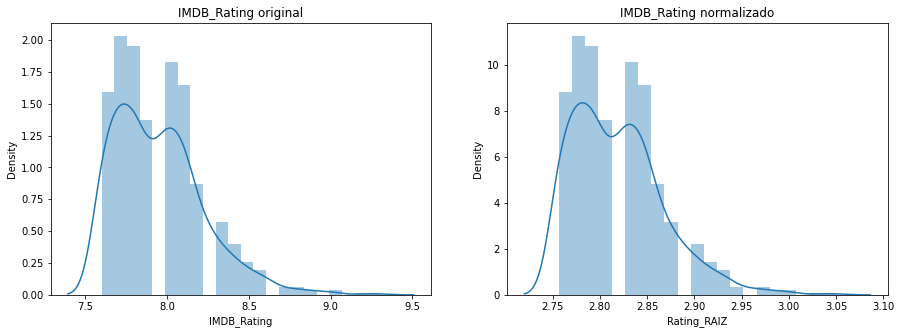

In [67]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('IMDB_Rating original')
axes[1].set_title('IMDB_Rating normalizado')

sns.distplot(df['IMDB_Rating'] ,ax = axes[0])
sns.distplot(df['Rating_RAIZ'], ax = axes[1]);

In [68]:
stats.shapiro(df["Rating_RAIZ"])

ShapiroResult(statistic=0.9238368272781372, pvalue=4.467296839508009e-22)

<p>4. Box-Cox </p>

In [69]:
df['Rating_BOX'], lambda_ajustada = stats.boxcox(df['IMDB_Rating'])

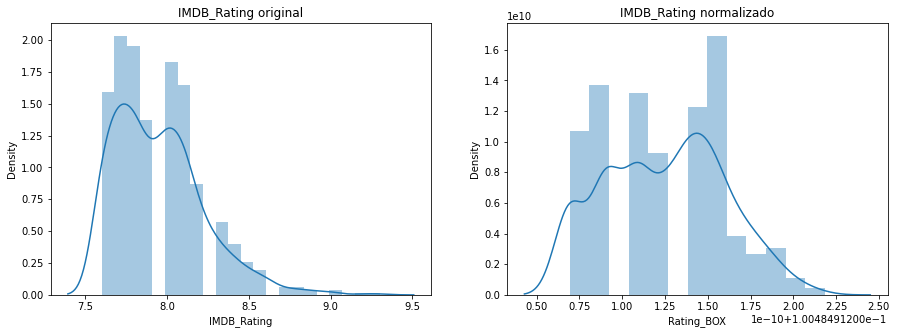

In [70]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('IMDB_Rating original')
axes[1].set_title('IMDB_Rating normalizado')

sns.distplot(df['IMDB_Rating'] ,ax = axes[0])
sns.distplot(df['Rating_BOX'], ax = axes[1]);

In [71]:
stats.shapiro(df["Rating_BOX"])

ShapiroResult(statistic=1.0, pvalue=1.0)

<p>5. Sklearn MinmaxScaler()</p>

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
minmax = MinMaxScaler()

In [74]:
X_normalizadas = minmax.fit_transform(df[["IMDB_Rating"]])

In [75]:
Rating_minmax = pd.DataFrame(X_normalizadas, columns = ["Rating_Sklearn"])
Rating_minmax.head(2)

,Rating_Sklearn
0,1.000000
1,0.941176


In [76]:
df["Rating_Sklearn"] = Rating_minmax

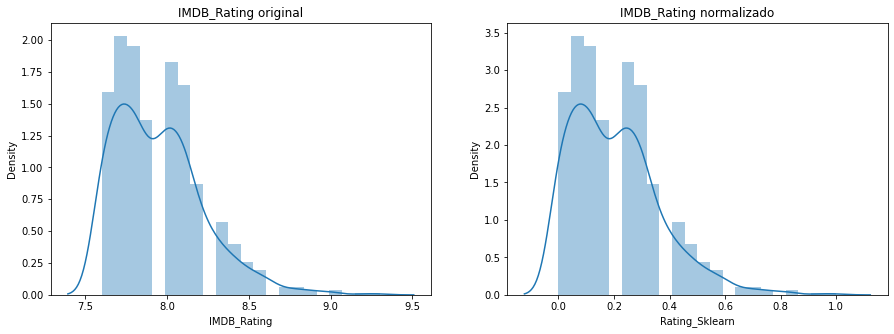

In [77]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('IMDB_Rating original')
axes[1].set_title('IMDB_Rating normalizado')

sns.distplot(df['IMDB_Rating'] ,ax = axes[0])
sns.distplot(df['Rating_Sklearn'], ax = axes[1]);

In [78]:
stats.shapiro(df['Rating_Sklearn'])

ShapiroResult(statistic=0.9192966818809509, pvalue=1.101942380454444e-22)

In [79]:
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ratings_NORM,Rating_LOG,Rating_RAIZ,Rating_Sklearn
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,0.794529,2.230014,3.04959,1.000000
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,0.735706,2.219203,3.03315,0.941176


In [80]:
df.drop(['Ratings_NORM', 'Rating_RAIZ','Rating_LOG', 'Rating_Sklearn'], axis =1, inplace = True)

In [81]:
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485


<p>Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings</p>

In [82]:
df.to_pickle('datos/peliculas_limpio.pkl')